### 28E24013 大木啓輔

### 必要なモジュールをインポートする

In [1]:
# 必要なライブラリのインストール
!pip install -q slycot control

# 必要なモジュールのインポート
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$P = \frac{s - 5}{(s + 1)(s + 10)}$

In [2]:
print("制御対象を準備")

# Pを作る
P = matlab.tf([1, -5],[1, 1])*matlab.tf([1],[1, 10])
print("P =", P) #Pを出力

print("極を確認")
matlab.pole(P) #極を確認

制御対象を準備
P = <TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     s - 5
---------------
s^2 + 11 s + 10

極を確認


array([-10.+0.j,  -1.+0.j])

$\frac{1}{P(s)} = \frac{(s + 1)(s + 10)}{(s - 5)}$
### 不安定零点$s=5$よりも低い周波数と高い周波数に分ける
$\frac{1}{P(s)} = -5(s+1)*\frac{-5}{s-5}\frac{s+10}{25}$
### For sufficient small w>0，
$\frac{1}{P(s)} = \frac{(s + 1)(s + 10)}{(s - 5)}\approx-5(s+1)=Q_1(s)$
### For sufficient large a (relative order of P(s) is 1),
$Q(s)=Q_1(s)\frac{a}{s+a}=-2(s+1)\frac{a}{s+a}$
### 以上の計算を以下に適用する
$K(s)=\frac{Q(s)}{1-Q(s)P(s)}$

$T(s)=\frac{P(s)K(s)}{1+P(s)K(s)}=P(s)Q(s)$

$S(s)=\frac{1}{1+P(s)K(s)}=1-T(s)$

Q = <TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-20 s - 20
----------
  s + 10

K = <TransferFunction>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-20 s^4 - 440 s^3 - 2820 s^2 - 4400 s - 2000
--------------------------------------------
       s^4 + 51 s^3 + 450 s^2 + 400 s

T = <TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   -20 s^2 + 80 s + 100
--------------------------
s^3 + 21 s^2 + 120 s + 100

Tの極を確認
[-10.00000014+0.j  -9.99999986+0.j  -1.        +0.j]
S = <TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   s^3 + 41 s^2 + 40 s
--------------------------
s^3 + 21 s^2 + 120 s + 100

Sの極を確認
[-10.00000014+0.j  -9.99999986+0.j  -1.        +0.j]
S(s)のボード線図
T(s)のボード線図


Text(0.5, 1.0, 'Bode plot of T(s)')

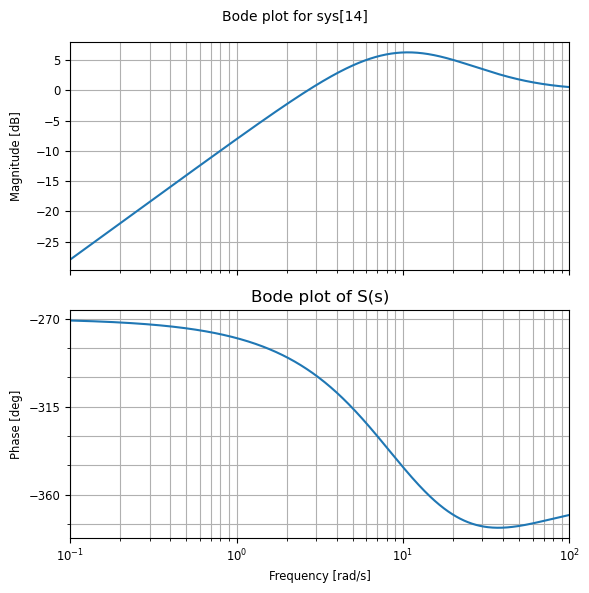

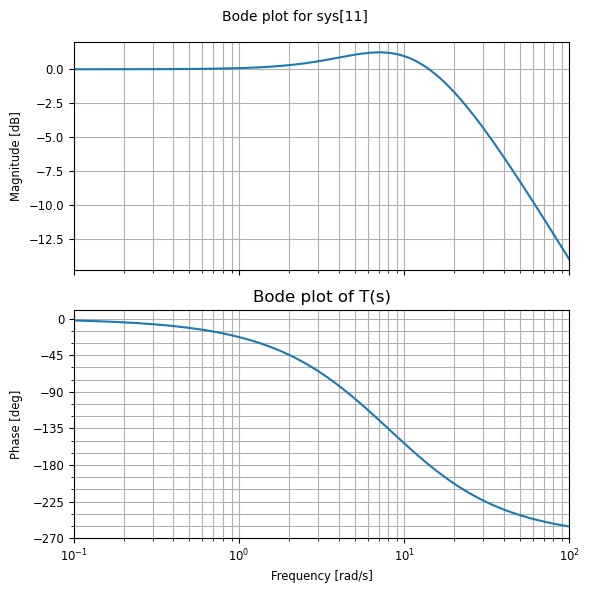

In [3]:
a = 10

# Qを作る
Q = -2 * a * matlab.tf([1, 1], [1, a])
print("Q =", Q)  # Qを出力

# Kを作る
K = Q / (1 - P * Q)
print("K =", K)  # Kを出力

# Tを作る
T = P * Q
print("T =", T)  # Tを出力

# Tの極を確認
print("Tの極を確認")
poles_T = matlab.pole(T)
print(poles_T)  # 極を出力

# Sを作る
S = 1 - T
print("S =", S)  # Sを出力

# Sの極を確認
print("Sの極を確認")
poles_S = matlab.pole(S)
print(poles_S)  # 極を出力

# ボード線図のプロット
print("S(s)のボード線図")
fig = plt.figure(figsize = (6, 6)) #12×6のfigureを作成
mag, phase, omega = matlab.bode(S, Hz=False) #figureにボード線図を描画
plt.xlim(1e-01, 1e+02) # x軸の範囲を1e-01から1e+02に設定
plt.title('Bode plot of S(s)')

print("T(s)のボード線図")
fig = plt.figure(figsize = (6, 6)) #12×6のfigureを作成
mag, phase, omega = matlab.bode(T, Hz=False) #figureにボード線図を描画
plt.xlim(1e-01, 1e+02) # x軸の範囲を1e-01から1e+02に設定
plt.title('Bode plot of T(s)')

$sys1=\frac{K(s)}{1+P(s)K(s)}$

$sys2=\frac{P(s)}{1+P(s)K(s)}$

$sys3=\frac{P(s)K(s)}{1+P(s)K(s)}$

### の極を求め，内部安定化されていることを確認

In [4]:
# sys1を作る
sys1 = K / (1 + P * K)
print("sys1の極を確認")
poles_sys1 = matlab.pole(sys1)
print(poles_sys1)  # 極を出力

# sys2を作る
sys2 = P / (1 + P * K)
print("sys2の極を確認")
poles_sys2 = matlab.pole(sys2)
print(poles_sys2)  # 極を出力

# sys3を作る
sys3 = P * K / (1 + P * K)
print("sys3の極を確認")
poles_sys3 = matlab.pole(sys3)
print(poles_sys3)  # 極を出力

sys1の極を確認
[-40.        +0.00000000e+00j -10.01340485+0.00000000e+00j
 -10.00415549+1.27530948e-02j -10.00415549-1.27530948e-02j
  -9.98914209+7.89721556e-03j  -9.98914209-7.89721556e-03j
  -1.00001019+1.76529230e-05j  -1.00001019-1.76529230e-05j
  -0.99997962+0.00000000e+00j   0.        +0.00000000e+00j]
sys2の極を確認
[-10.01610133+0.00000000e+00j -10.00497685+1.53136952e-02j
 -10.00497685-1.53136952e-02j  -9.98697249+9.46585211e-03j
  -9.98697249-9.46585211e-03j  -1.00001127+1.95262295e-05j
  -1.00001127-1.95262295e-05j  -0.99997745+0.00000000e+00j]
sys3の極を確認
[-40.        +0.j         -10.05899837+0.03416089j
 -10.05899837-0.03416089j  -9.99983143+0.06802729j
  -9.99983143-0.06802729j  -9.9411702 +0.0338689j
  -9.9411702 -0.0338689j   -1.0003098 +0.00030996j
  -1.0003098 -0.00030996j  -0.9996902 +0.00030965j
  -0.9996902 -0.00030965j   0.        +0.j        ]


### 以上より，sys1,2,3の極の実部は負となり，内部安定．